## Affinity Propagation
- 모든 데이터가 특정한 기준에 따라 자신을 대표할 대표 데이터를 선택한다.
- 만약 스스로가 자기 자신을 대표하게 되면 클러스터의 중심이 된다.

In [1]:
from sklearn.datasets.samples_generator import make_blobs

centers = [[1,1], [-1,-1], [1,-1]]
X, labels_true = make_blobs(n_samples = 300, centers = centers, cluster_std= 0.5, 
                        random_state = 0)

In [2]:
from sklearn.cluster import AffinityPropagation
model = AffinityPropagation(preference = -50).fit(X)

In [3]:
cluster_centers_indices = model.cluster_centers_indices_
labels = model.labels_
n_clusters_ = len(cluster_centers_indices)

from sklearn import metrics


print('Estimated number of clusters: %d' % n_clusters_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f" % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(X, labels, metric='sqeuclidean'))

Estimated number of clusters: 3
Homogeneity: 0.872
Completeness: 0.872
V-measure: 0.872
Adjusted Rand Index: 0.912
Adjusted Mutual Information: 0.871
Silhouette Coefficient: 0.753


C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1320: UserWarning: findfont: Font family ['nanumgothic'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


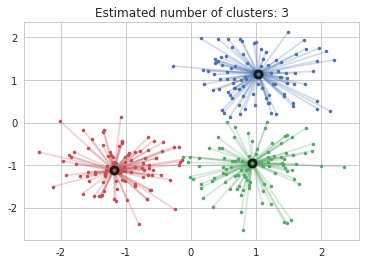

In [6]:
from itertools import cycle
%matplotlib inline

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, 
                alpha=0.25)
    plt.plot(cluster_center[0], cluster_center[1], 'o', mec='k', mew=3, 
            markersize=7)
    
plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()